In [120]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as p

In [121]:
data = pd.read_csv('../data/harare-metropolian-updated.csv')
data.shape

(940, 21)

In [122]:
data.head()

suburb density property  price  rooms  bedroom  toilets  ensuite  \
0    ARCADIA  MEDIUM    HOUSE    750      8        4        3        2   
1   HATFIELD  MEDIUM    HOUSE    700      8        4        4        3   
2   GOODHOPE  MEDIUM    HOUSE    750      7        2        2        1   
3  CHIKURUBI  MEDIUM    HOUSE    600      7        3        1        0   
4  CHADCOMBE  MEDIUM    HOUSE    650      6        3        2        1   

   condition constituency  ... carport  pool  furnished  cottage  power  \
0          3  SUNNINGDALE  ...       2     0          1        2      1   
1          3     HATFIELD  ...       2     0          1        0      1   
2          4  HARARE WEST  ...       2     0          0        0      1   
3          3  HARARE EAST  ...       0     0          1        0      1   
4          4     HATFIELD  ...       1     0          1        3      0   

   pbackup  water  wbackup  gated  garden  
0        0      1        1      0       1  
1        0      1        1      1       1  
2        0      1        0      0       1  
3        0      1        1      0       1  
4        0      1        0      0       1  

[5 rows x 21 columns]

- Let's check the last five rows from data

In [123]:
data.tail()

suburb density property  price  rooms  bedroom  toilets  ensuite  \
935   BORROWDALE     LOW  COTTAGE    500      4        2        2        1   
936   MSASA PARK     LOW  COTTAGE    250      2        0        1        3   
937   ASHBRITTLE     LOW  COTTAGE    250      2        0        1        0   
938  MARLBOROUGH     LOW  COTTAGE    320      4        3        3        2   
939  MARLBOROUGH     LOW  CLUSTER    400      2        0        1        0   

     condition constituency  ... carport  pool  furnished  cottage  power  \
935          3  HARARE EAST  ...       0     0          1        0      1   
936          3     HATFIELD  ...       0     0          0        0      1   
937          3  HARARE WEST  ...       0     0          0        0      1   
938          2  HARARE WEST  ...       0     0          0        0      1   
939          4  HARARE WEST  ...       0     0          1        0      1   

     pbackup  water  wbackup  gated  garden  
935        0      1        0      0       1  
936        1      1        1      0       1  
937        0      1        0      0       1  
938        0      1        0      0       1  
939        0      1        1      0       1  

[5 rows x 21 columns]

- Let's check the random ten number of data samples, Every time it will print the random five sample of records from original datasets. So we can easly understand the behaviour and what types of data type stored in particular features.

In [124]:
data.sample(10)

suburb   density property  price  rooms  bedroom  toilets  \
512         BELLAPAISE  COMPOUND  CLUSTER     35      1        0        1   
634          CHADCOMBE    MEDIUM  CLUSTER     80      1        0        1   
33            HATFIELD    MEDIUM  COTTAGE    520      5        3        2   
145           ST MARYS      HIGH  CLUSTER    100      2        0        1   
717         BLUFF HILL       LOW     FLAT   2700     12        5        3   
158        KUWADZANA 8      HIGH  CLUSTER    100      2        0        1   
364          OVERSPILL  COMPOUND  CLUSTER     70      2        0        1   
840     MOUNT PLEASANT       LOW    HOUSE   1200      8        4        2   
705  BORROWDALE BROOKE       LOW    HOUSE   3000      7        4        2   
84       HOUGHTON PARK      HIGH  CLUSTER    180      3        1        1   

     ensuite  condition    constituency  ... carport  pool  furnished  \
512        0          2         HUNYANI  ...       0     0          0   
634        0          3        HATFIELD  ...       0     0          0   
33         1          3        HATFIELD  ...       1     0          1   
145        0          3        ST MARYS  ...       0     0          0   
717        2          4     HARARE WEST  ...       3     1          1   
158        0          3  KUWADZANA WEST  ...       0     0          1   
364        0          2   EPWORTH SOUTH  ...       0     0          0   
840        1          3  MOUNT PLEASANT  ...       2     0          1   
705        1          5     HARARE EAST  ...       0     1          1   
84         0          3     SUNNINGDALE  ...       0     0          0   

     cottage  power  pbackup  water  wbackup  gated  garden  
512        0      1        0      1        1      0       0  
634        0      1        0      1        1      0       1  
33         0      1        0      1        1      0       1  
145        0      1        0      1        0      0       0  
717        3      1        1      1        1      0       1  
158        0      1        0      1        0      0       0  
364        0      1        0      0        0      0       0  
840        0      1        1      1        1      0       1  
705        1      1        1      1        1      1       1  
84         0      1        0      1        0      0       0  

[10 rows x 21 columns]

### Target Feature

In [125]:

TARGET_FEATURE = 'price'

Y = data[TARGET_FEATURE]

Y.head()

0    750
1    700
2    750
3    600
4    650
Name: price, dtype: int64

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   suburb        940 non-null    object
 1   density       940 non-null    object
 2   property      940 non-null    object
 3   price         940 non-null    int64 
 4   rooms         940 non-null    int64 
 5   bedroom       940 non-null    int64 
 6   toilets       940 non-null    int64 
 7   ensuite       940 non-null    int64 
 8   condition     940 non-null    int64 
 9   constituency  940 non-null    object
 10  council       940 non-null    object
 11  carport       940 non-null    int64 
 12  pool          940 non-null    int64 
 13  furnished     940 non-null    int64 
 14  cottage       940 non-null    int64 
 15  power         940 non-null    int64 
 16  pbackup       940 non-null    int64 
 17  water         940 non-null    int64 
 18  wbackup       940 non-null    int64 
 19  gated   

As we can see in the output.

1. There are **13580 entries**
1. There are total **21 features (0 to 20)**
1. There are three types of datatype dtypes: **float64(12), int64(1), object(8)**
1. It's Memory usage that is, memory usage: **2.2+ MB**
1. Also, We can check how many missing values available in the **Non-Null Count** column

In [127]:
data.describe()

price       rooms     bedroom     toilets     ensuite  \
count   940.000000  940.000000  940.000000  940.000000  940.000000   
mean    468.744681    3.475532    1.189362    1.363830    0.419149   
std     694.040752    2.253488    1.571950    0.720586    0.678951   
min      20.000000    1.000000    0.000000    0.000000    0.000000   
25%      60.000000    2.000000    0.000000    1.000000    0.000000   
50%     160.000000    3.000000    0.000000    1.000000    0.000000   
75%     550.000000    5.000000    3.000000    2.000000    1.000000   
max    3500.000000   13.000000    7.000000    6.000000    5.000000   

        condition     carport        pool   furnished     cottage       power  \
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000   
mean     2.873404    0.355319    0.071277    0.346809    0.196809    0.761702   
std      0.914872    0.711479    0.257423    0.476208    0.653157    0.426269   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
50%      3.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
75%      4.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
max      5.000000    4.000000    1.000000    1.000000    4.000000    1.000000   

          pbackup       water     wbackup       gated      garden  
count  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     0.156383    0.717021    0.550000    0.067021    0.394681  
std      0.363411    0.450686    0.497759    0.250192    0.489042  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    1.000000    1.000000    0.000000    0.000000  
75%      0.000000    1.000000    1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

Here,`describe()` method provides us the complete calculations details about the dataset. i.e. let's take the `price` feature for example. It shows the what's the `min`, `max`, `mean(average)` and `std(standard deviation)` of price feature.

In [128]:
data.price.describe([.2, .4, .6, .8])

count     940.000000
mean      468.744681
std       694.040752
min        20.000000
20%        55.000000
40%       106.000000
50%       160.000000
60%       300.000000
80%       650.000000
max      3500.000000
Name: price, dtype: float64

### Categorical Features

In [129]:
numeric_features = data.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)

(Index(['price', 'rooms', 'bedroom', 'toilets', 'ensuite', 'condition',
        'carport', 'pool', 'furnished', 'cottage', 'power', 'pbackup', 'water',
        'wbackup', 'gated', 'garden'],
       dtype='object'),
 16)

### Numerical Features

In [130]:
categorical_features = data.select_dtypes('object').columns

categorical_features, len(categorical_features)

(Index(['suburb', 'density', 'property', 'constituency', 'council'], dtype='object'),
 5)

In [131]:
print("Number of `Numerical` Features are:", len(numeric_features) )
print("Number of `Categorical` Features are:", len(categorical_features) )

Number of `Numerical` Features are: 16
Number of `Categorical` Features are: 5


### Find the Missing Values

Here, We need to find how many missing values are there in our datasets.

In [132]:
data.isna().sum().sort_values(ascending=False)

suburb          0
carport         0
gated           0
wbackup         0
water           0
pbackup         0
power           0
cottage         0
furnished       0
pool            0
council         0
density         0
constituency    0
condition       0
ensuite         0
toilets         0
bedroom         0
rooms           0
price           0
property        0
garden          0
dtype: int64

Here, We convert the number of missing values into percentages. So, we can easly understand to how many percentage of missing values available.

In [133]:
(data.isna().sum() * 100 / data.isna().count()).sort_values(ascending=False)

suburb          0.0
carport         0.0
gated           0.0
wbackup         0.0
water           0.0
pbackup         0.0
power           0.0
cottage         0.0
furnished       0.0
pool            0.0
council         0.0
density         0.0
constituency    0.0
condition       0.0
ensuite         0.0
toilets         0.0
bedroom         0.0
rooms           0.0
price           0.0
property        0.0
garden          0.0
dtype: float64

In [134]:
# Now, is there any missing values are there?
data.isna().any()

suburb          False
density         False
property        False
price           False
rooms           False
bedroom         False
toilets         False
ensuite         False
condition       False
constituency    False
council         False
carport         False
pool            False
furnished       False
cottage         False
power           False
pbackup         False
water           False
wbackup         False
gated           False
garden          False
dtype: bool

#### Categorical Features

In [135]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 940
Total Unique Records of suburb = 177
Total Unique Records of density = 4
Total Unique Records of property = 4
Total Unique Records of constituency = 30
Total Unique Records of council = 3


###### Removing columns which has huge number of unique values

# 3. Data Visualizations


In [136]:
data.sample(4)


suburb   density property  price  rooms  bedroom  toilets  \
167     BUTLER FARM  COMPOUND  CLUSTER     60      2        0        1   
903        AVONDALE       LOW  COTTAGE    400      3        1        1   
286      QUEENSDALE    MEDIUM  COTTAGE    180      2        0        1   
697  GREYSTONE PARK       LOW     FLAT   3500     10        7        4   

     ensuite  condition    constituency  ... carport  pool  furnished  \
167        0          2         HUNYANI  ...       0     0          0   
903        0          3  MOUNT PLEASANT  ...       0     0          0   
286        0          3     SUNNINGDALE  ...       0     0          0   
697        3          5     HARARE EAST  ...       2     1          1   

     cottage  power  pbackup  water  wbackup  gated  garden  
167        0      0        0      0        1      0       0  
903        0      1        0      1        1      0       1  
286        0      1        0      1        1      0       0  
697        0      1        1      1        1      0       1  

[4 rows x 21 columns]

In [137]:
corr_ = data[numeric_features].corr()
corr_

price     rooms   bedroom   toilets   ensuite  condition  \
price      1.000000  0.810067  0.798034  0.760344  0.680930   0.649939   
rooms      0.810067  1.000000  0.913438  0.773469  0.709025   0.571616   
bedroom    0.798034  0.913438  1.000000  0.808777  0.742777   0.609101   
toilets    0.760344  0.773469  0.808777  1.000000  0.865590   0.491568   
ensuite    0.680930  0.709025  0.742777  0.865590  1.000000   0.529570   
condition  0.649939  0.571616  0.609101  0.491568  0.529570   1.000000   
carport    0.617178  0.590613  0.563475  0.551468  0.513686   0.501112   
pool       0.658152  0.477570  0.450856  0.468614  0.389462   0.372979   
furnished  0.600729  0.609305  0.632040  0.525707  0.524894   0.572657   
cottage    0.580297  0.452231  0.447016  0.440533  0.373327   0.376793   
power      0.289735  0.301020  0.331242  0.237488  0.268211   0.504222   
pbackup    0.525487  0.437064  0.470089  0.437247  0.441910   0.389532   
water      0.344199  0.376959  0.395903  0.278011  0.314949   0.587149   
wbackup    0.236840  0.220409  0.254654  0.210512  0.246740   0.307408   
gated      0.329462  0.253189  0.252019  0.278099  0.310920   0.241824   
garden     0.579838  0.555241  0.602262  0.477542  0.517977   0.599751   

            carport      pool  furnished   cottage     power   pbackup  \
price      0.617178  0.658152   0.600729  0.580297  0.289735  0.525487   
rooms      0.590613  0.477570   0.609305  0.452231  0.301020  0.437064   
bedroom    0.563475  0.450856   0.632040  0.447016  0.331242  0.470089   
toilets    0.551468  0.468614   0.525707  0.440533  0.237488  0.437247   
ensuite    0.513686  0.389462   0.524894  0.373327  0.268211  0.441910   
condition  0.501112  0.372979   0.572657  0.376793  0.504222  0.389532   
carport    1.000000  0.495372   0.531728  0.534572  0.237345  0.460354   
pool       0.495372  1.000000   0.354132  0.499197  0.145247  0.392996   
furnished  0.531728  0.354132   1.000000  0.386354  0.328866  0.418573   
cottage    0.534572  0.499197   0.386354  1.000000  0.122726  0.404105   
power      0.237345  0.145247   0.328866  0.122726  1.000000  0.165197   
pbackup    0.460354  0.392996   0.418573  0.404105  0.165197  1.000000   
water      0.287336  0.174037   0.398213  0.189395  0.541107  0.198954   
wbackup    0.256509  0.125916   0.200829  0.125294  0.031119  0.259925   
gated      0.260936  0.140709   0.269505  0.140773  0.109970  0.118860   
garden     0.484137  0.334624   0.596005  0.323348  0.364799  0.389388   

              water   wbackup     gated    garden  
price      0.344199  0.236840  0.329462  0.579838  
rooms      0.376959  0.220409  0.253189  0.555241  
bedroom    0.395903  0.254654  0.252019  0.602262  
toilets    0.278011  0.210512  0.278099  0.477542  
ensuite    0.314949  0.246740  0.310920  0.517977  
condition  0.587149  0.307408  0.241824  0.599751  
carport    0.287336  0.256509  0.260936  0.484137  
pool       0.174037  0.125916  0.140709  0.334624  
furnished  0.398213  0.200829  0.269505  0.596005  
cottage    0.189395  0.125294  0.140773  0.323348  
power      0.541107  0.031119  0.109970  0.364799  
pbackup    0.198954  0.259925  0.118860  0.389388  
water      1.000000  0.001424  0.140042  0.405804  
wbackup    0.001424  1.000000  0.122714  0.266651  
gated      0.140042  0.122714  1.000000  0.192662  
garden     0.405804  0.266651  0.192662  1.000000

Text(0.5, 1.0, 'condition')

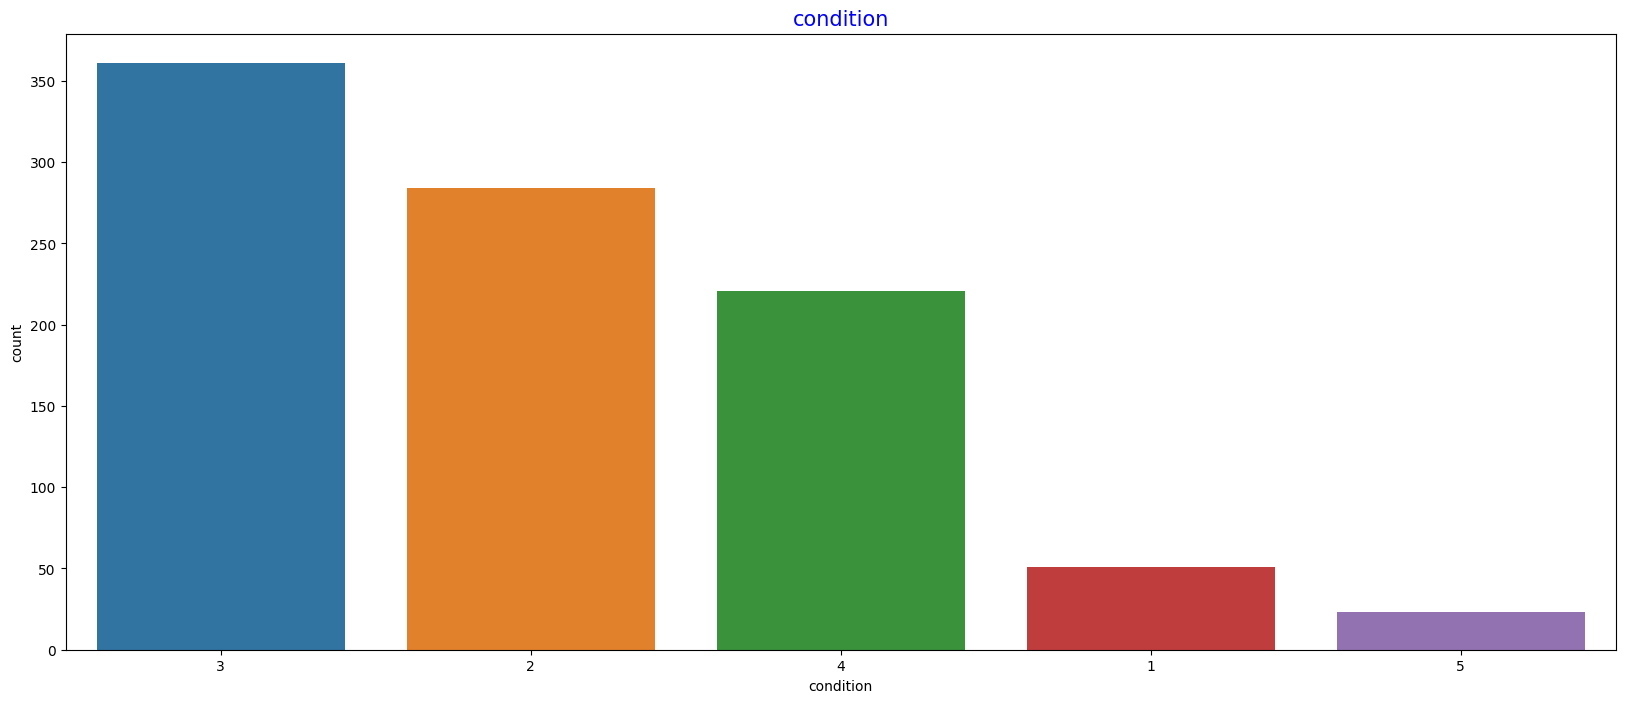

In [138]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='condition', order=data['condition'].value_counts().index)
plt.title("condition", color='blue', fontsize=15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedroom'}>,
        <Axes: title={'center': 'toilets'}>],
       [<Axes: title={'center': 'ensuite'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'carport'}>,
        <Axes: title={'center': 'pool'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'cottage'}>,
        <Axes: title={'center': 'power'}>,
        <Axes: title={'center': 'pbackup'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'wbackup'}>,
        <Axes: title={'center': 'gated'}>,
        <Axes: title={'center': 'garden'}>]], dtype=object)

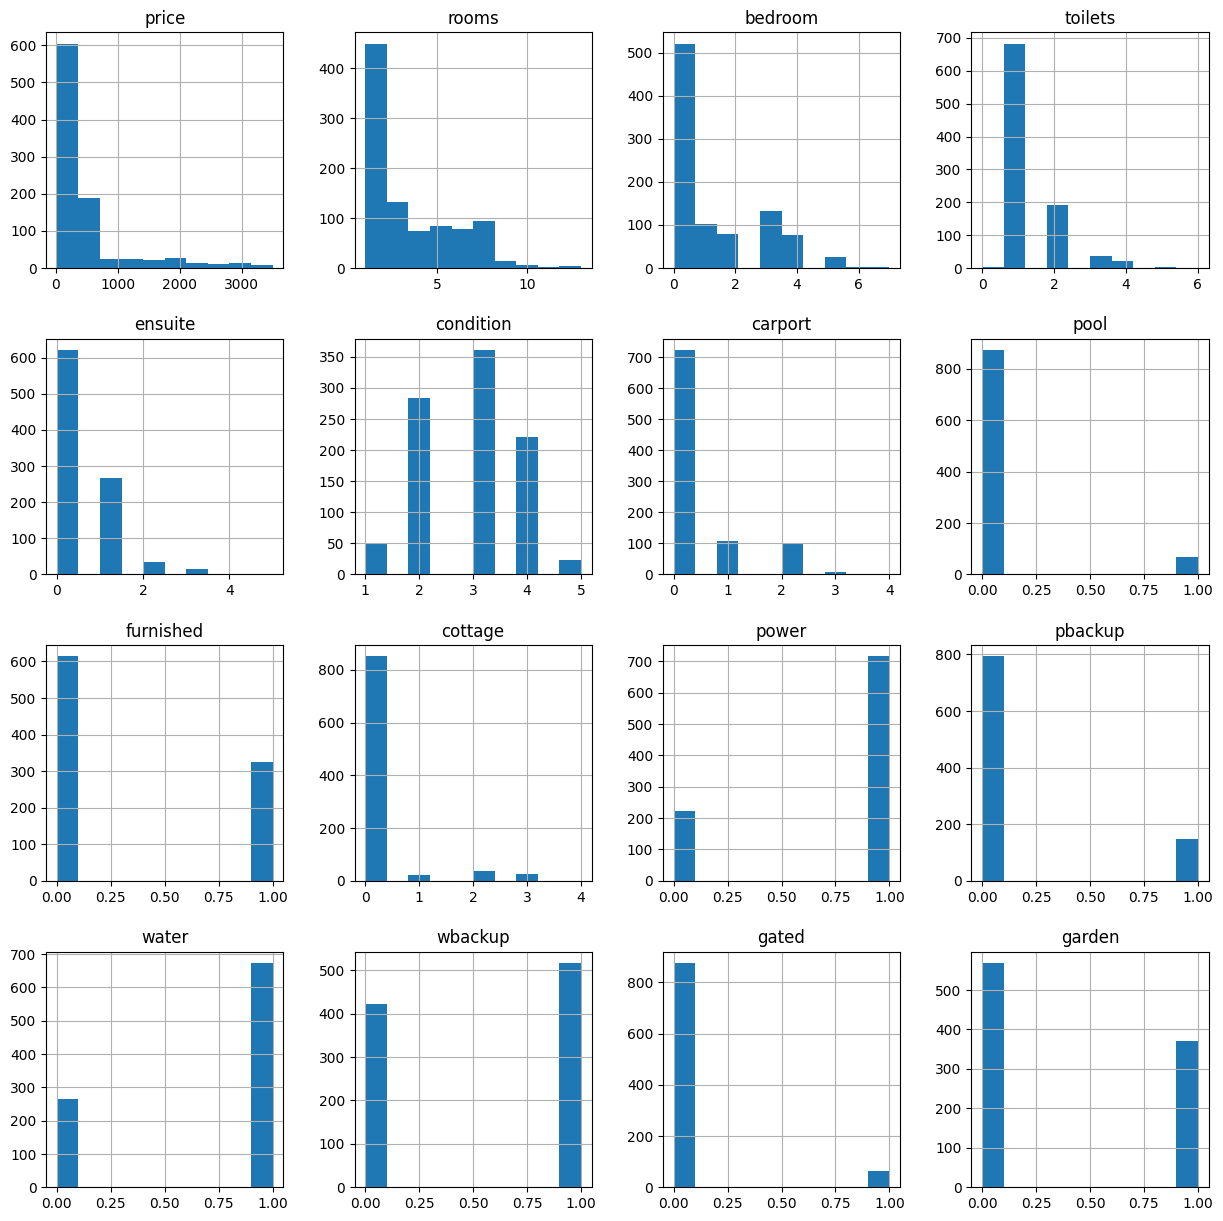

In [139]:
data.hist(figsize=(15,15))

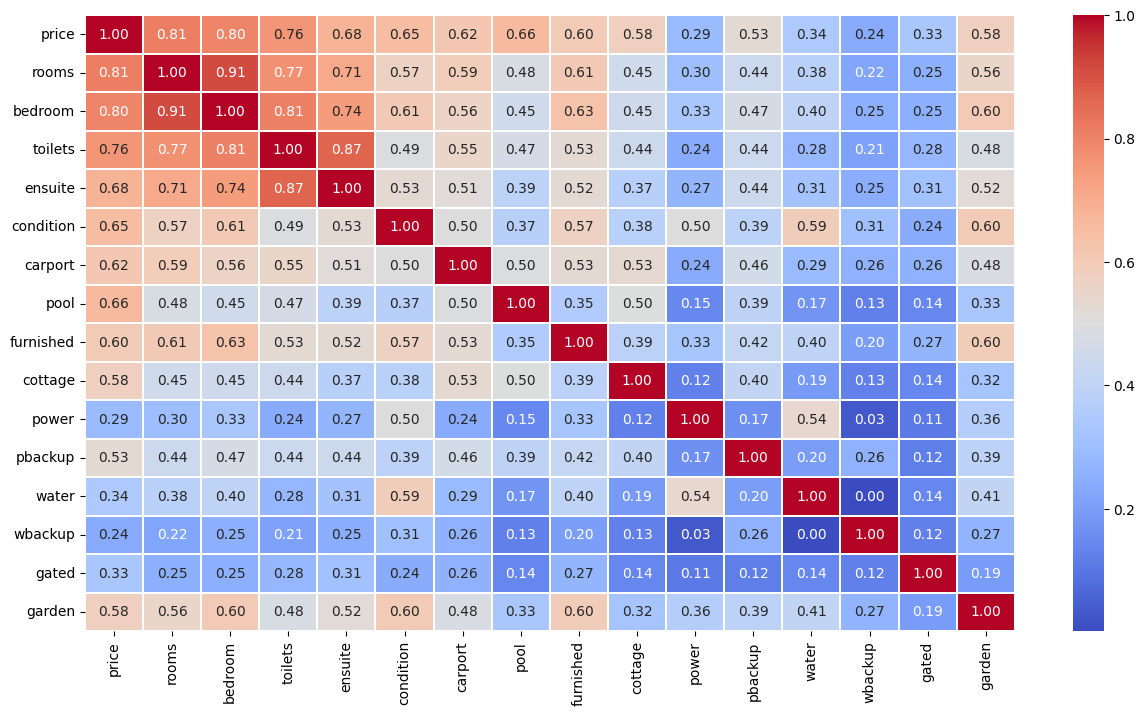

In [140]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

## Feature Selection


- Here, We need to convert categorical values to numerical values

In [141]:
data[categorical_features].value_counts()

suburb          density   property  constituency    council            
STONERIDGE      COMPOUND  CLUSTER   CHURU           HARARE MUNICIPALITY    25
PANGUOLA FARM   COMPOUND  CLUSTER   HARARE EAST     HARARE MUNICIPALITY    17
OVERSPILL       COMPOUND  CLUSTER   EPWORTH SOUTH   EPWORTH LOCAL BOARD    17
MABVAZUVA       COMPOUND  CLUSTER   EPWORTH NORTH   EPWORTH LOCAL BOARD    15
MOUNT PLEASANT  LOW       HOUSE     MOUNT PLEASANT  HARARE MUNICIPALITY    13
                                                                           ..
LENANA PARK     LOW       COTTAGE   HARARE WEST     HARARE MUNICIPALITY     1
LOGAN PARK      COMPOUND  COTTAGE   HUNYANI         HARARE MUNICIPALITY     1
MABELREIGN      LOW       CLUSTER   MOUNT PLEASANT  HARARE MUNICIPALITY     1
                          HOUSE     MOUNT PLEASANT  HARARE MUNICIPALITY     1
ZINYENGERE      COMPOUND  COTTAGE   HUNYANI         EPWORTH LOCAL BOARD     1
Name: count, Length: 351, dtype: int64

- Implementing `LabelEncoder` to convert categorical values to numerical values.

In [142]:
# Encoding ...
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

In [143]:
correlation_mat = data.corr()

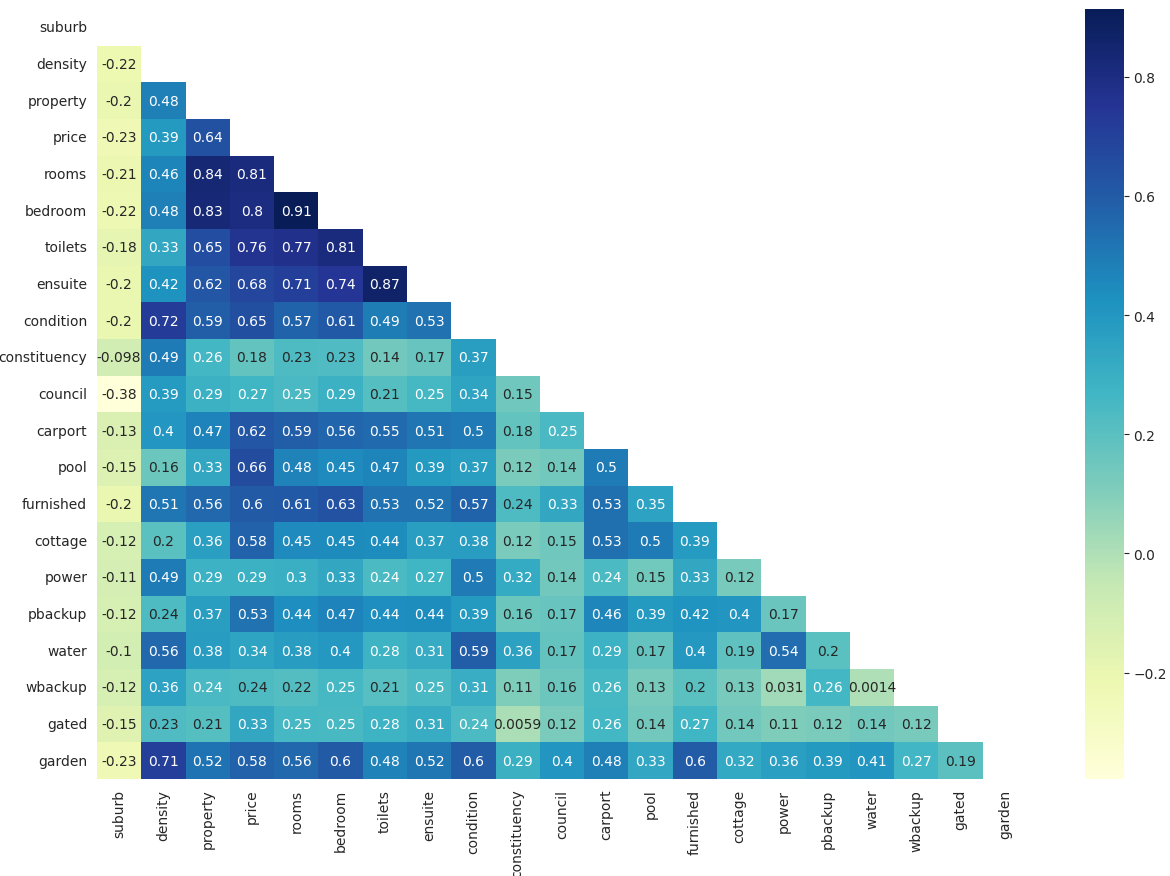

In [144]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7,6))
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

- Creating Training Feature to train the model to predict the beter accuracy.

In [145]:

# training_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                         'YearBuilt', 'Lattitude', 'Longtitude']

training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('price')

# show the final list
training_features

['rooms',
 'bedroom',
 'toilets',
 'ensuite',
 'condition',
 'carport',
 'pool',
 'furnished',
 'cottage',
 'power',
 'pbackup',
 'water',
 'wbackup',
 'gated',
 'garden',
 'suburb',
 'density',
 'property',
 'constituency',
 'council']

In [146]:
for col in training_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Unique Records of rooms = 13
Total Unique Records of bedroom = 8
Total Unique Records of toilets = 7
Total Unique Records of ensuite = 6
Total Unique Records of condition = 5
Total Unique Records of carport = 5
Total Unique Records of pool = 2
Total Unique Records of furnished = 2
Total Unique Records of cottage = 5
Total Unique Records of power = 2
Total Unique Records of pbackup = 2
Total Unique Records of water = 2
Total Unique Records of wbackup = 2
Total Unique Records of gated = 2
Total Unique Records of garden = 2
Total Unique Records of suburb = 177
Total Unique Records of density = 4
Total Unique Records of property = 4
Total Unique Records of constituency = 30
Total Unique Records of council = 3


### Scalling Dataset

- Here, We are using `MinMaxScaler` to notmalize our dataset. Firstly, we need to import that class from `sklearn.preprocessing` package

In [147]:
from sklearn.preprocessing import MinMaxScaler
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(data[training_features])

MinMaxScaler()

Create `X` data and assignning from `training feature` columns from `data` and make it normalized.

In [148]:
scaled = minMaxNorm.transform(data[training_features])

In [149]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA()

# Fit PCA to the scaled features
pca.fit(scaled)


# Transform the data using the fitted PCA model
X = pca.transform(data[training_features])
X

c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[ 8.60121532, -1.56147453, -1.86574524, ..., -2.54975289,
         3.7721024 ,  0.58427185],
       [ 1.5701552 , -3.70416475, -2.27266746, ..., -1.91079441,
         4.29417286,  0.93722224],
       [ 0.59067696, -4.25482342, -2.50521655, ..., -2.53013183,
         4.58196348,  0.71025757],
       ...,
       [ 2.7920073 , -2.13813256, -2.46258674, ..., -0.59072341,
         1.60992424,  0.74873657],
       [-4.82950525, -6.24545397, -4.08521513, ..., -1.15311068,
         2.18762604,  0.80842945],
       [-5.3999437 , -5.89756192, -5.78256743, ..., -1.1870119 ,
         2.46402853,  0.74311185]])

In [150]:
Y = data['price']  
Y

0      750
1      700
2      750
3      600
4      650
      ... 
935    500
936    250
937    250
938    320
939    400
Name: price, Length: 940, dtype: int64

## Splite Train and Test Dataset

Before we splite the data, We need to import train_test_split module from sklearn package

In [151]:
from sklearn.model_selection import train_test_split

### Splites the main data

- split data into training and validation data, for both features and target. The split is based on a random number generator.
- Supplying a numeric value to the random_state argument guarantees we get the same split eve run this script.

In [152]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2,random_state=101)

##### Check the train and test sized

In [153]:
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  940
Train size:  (752, 20) (752,)
Test size:  (188, 20) (188,)


# Model Building

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [155]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_Y)
lr_model_predicted = lr_model.predict(test_X)

In [156]:
print('model_name', lr_model.__class__.__name__)

lr_model_score = lr_model.score(test_X, test_Y )
print('prediction_score', lr_model_score)

mae = mean_absolute_error(test_Y, lr_model_predicted)
print('Mean Absolute Error', mae)

mse = mean_squared_error(test_Y, lr_model_predicted)
print("Mean Squared Error:", mse)

model_name LinearRegression
prediction_score 0.8615098976737854
Mean Absolute Error 179.90395458079942
Mean Squared Error: 68192.98600768369


C:\Users\T8\AppData\Local\Temp\ipykernel_252\3974801616.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

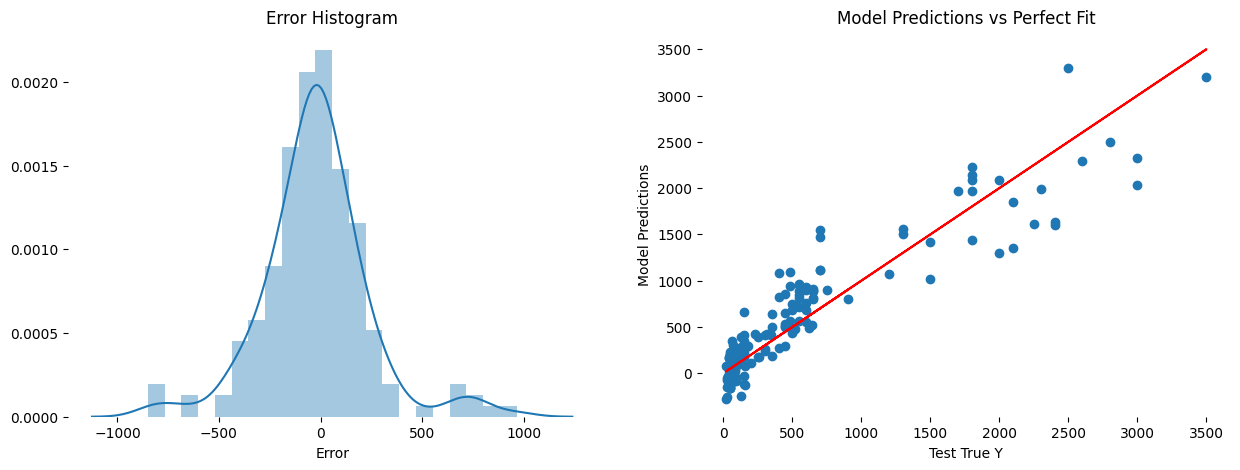

In [157]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,lr_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - lr_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [158]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', lr_model.predict(single_house))

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: [3083.5978365]

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


###### Store model and it's predictoin score in dataframe that we created below the model building section

### Decision Tree Regressor Model

In [159]:
Dtree_model = DecisionTreeRegressor(random_state=1)
Dtree_model.fit(train_X, train_Y)
Dtree_model_predicted = Dtree_model.predict(test_X)

In [160]:
print('model_name', Dtree_model.__class__.__name__)

Dtree_model_score = Dtree_model.score(test_X, test_Y)
print('prediction_score', Dtree_model_score)

mae = mean_absolute_error(Dtree_model_predicted, test_Y)
print('Mean Absolute Error', mae)

mse = mean_squared_error(lr_model_predicted, test_Y)
print("Mean Squared Error:", mse)

model_name DecisionTreeRegressor
prediction_score 0.5152808767787393
Mean Absolute Error 212.59751773049643
Mean Squared Error: 68192.98600768369


C:\Users\T8\AppData\Local\Temp\ipykernel_252\2944455186.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

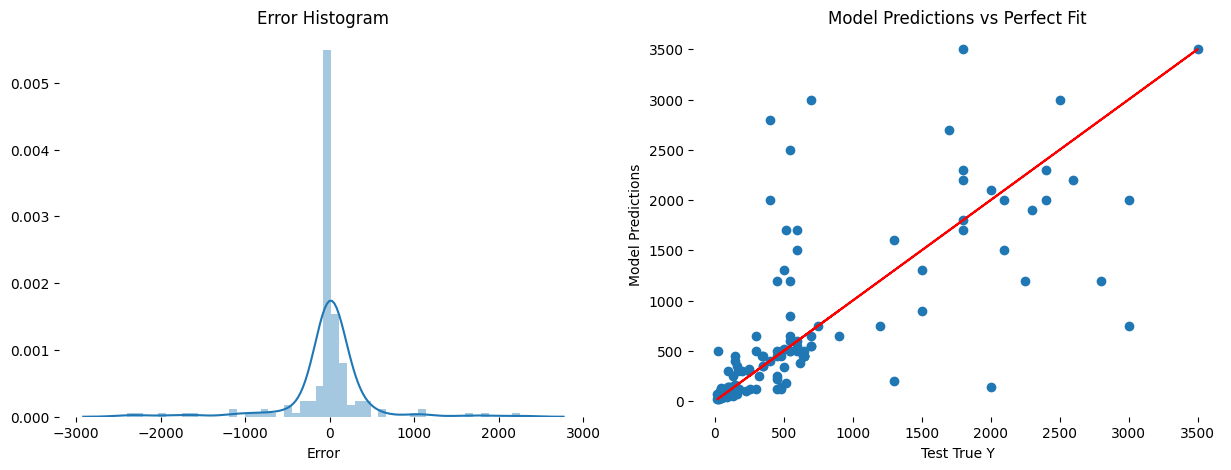

In [161]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,Dtree_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - Dtree_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [162]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', Dtree_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 3000.0

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Random Forest Regressor Model

In [163]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
RFRModel.fit(train_X, train_Y)
RFRModel_predicted = RFRModel.predict(test_X)

In [164]:
print('model_name', RFRModel.__class__.__name__)

RFRModel_score = RFRModel.score(test_X, test_Y)
print('prediction_score', RFRModel_score)

mae = mean_absolute_error(RFRModel_predicted, test_Y)
print('mean_absolute_error', mae)

mse = mean_squared_error(RFRModel_predicted, test_Y)
print("Mean Squared Error:", mse)

model_name RandomForestRegressor
prediction_score 0.890997748175511
mean_absolute_error 119.8703307586513
Mean Squared Error: 53673.07055607807


C:\Users\T8\AppData\Local\Temp\ipykernel_252\3629234381.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

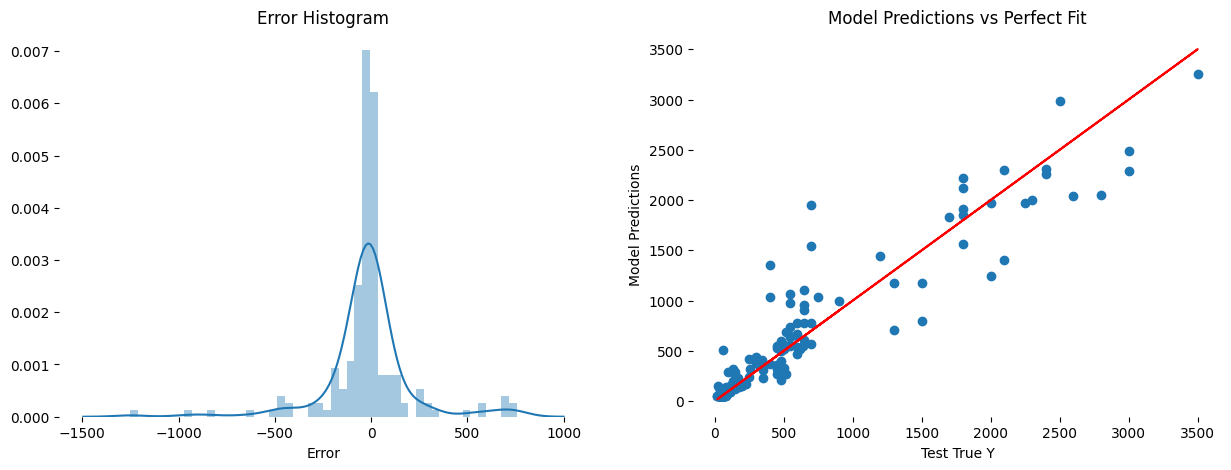

In [165]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,RFRModel_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - RFRModel_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [166]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', Dtree_model.predict(single_house))

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: [3000.]

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [167]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}

rfr_model = RandomForestRegressor(random_state=35)

# Create  object
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(train_X, train_Y)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 7, 'n_estimators': 100}


In [168]:
print('model_name', RFRModel.__class__.__name__)

RFRModel_score = RFRModel.score(test_X, test_Y)
print('prediction_score', RFRModel_score)

mae = mean_absolute_error(RFRModel_predicted, test_Y)
print('mean_absolute_error', mae)

mse = mean_squared_error(RFRModel_predicted, test_Y)
print("Mean Squared Error:", mse)
 

model_name RandomForestRegressor
prediction_score 0.890997748175511
mean_absolute_error 119.8703307586513
Mean Squared Error: 53673.07055607807


C:\Users\T8\AppData\Local\Temp\ipykernel_252\3629234381.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

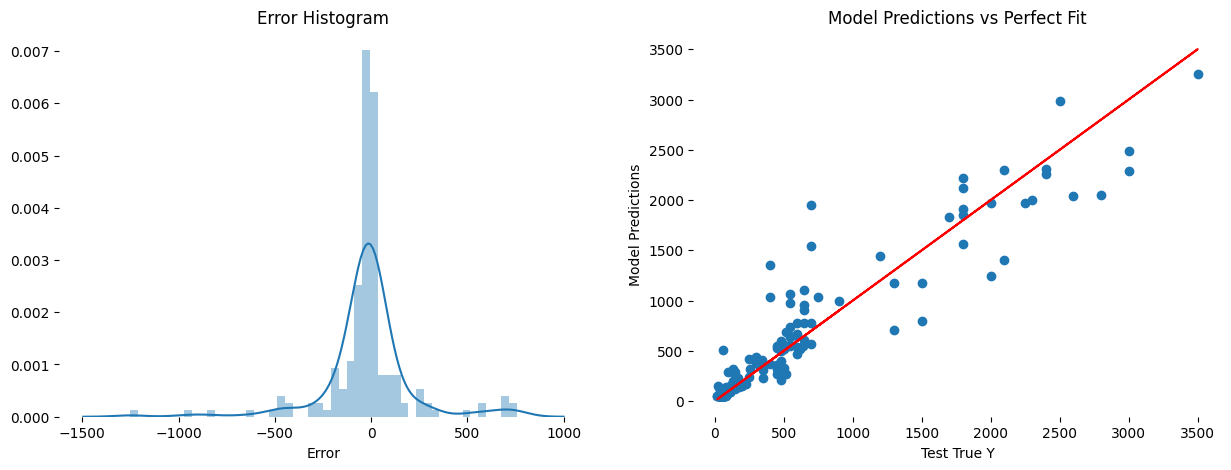

In [169]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,RFRModel_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - RFRModel_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [170]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', RFRModel.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 743.946960559545

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [171]:
# Creating Model
BGR_model = BaggingRegressor()

# Model Fitting
BGR_model.fit(train_X, train_Y)

# Model Prediction
BGR_model_predicted = BGR_model.predict(test_X)

# Model Score
BGR_model_score = BGR_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, BGR_model_predicted)

In [172]:
print('model_name', BGR_model.__class__.__name__)

BGR_model_score = BGR_model.score(test_X, test_Y)
print('prediction_score', BGR_model_score)

mae = mean_absolute_error(test_Y, BGR_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(BGR_model_predicted, test_Y)
print("Mean Squared Error:", mse)

model_name BaggingRegressor
prediction_score 0.8655070215987277
mean_absolute_error 133.9322188449848
Mean Squared Error: 66224.78892134958


C:\Users\T8\AppData\Local\Temp\ipykernel_252\1460954679.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

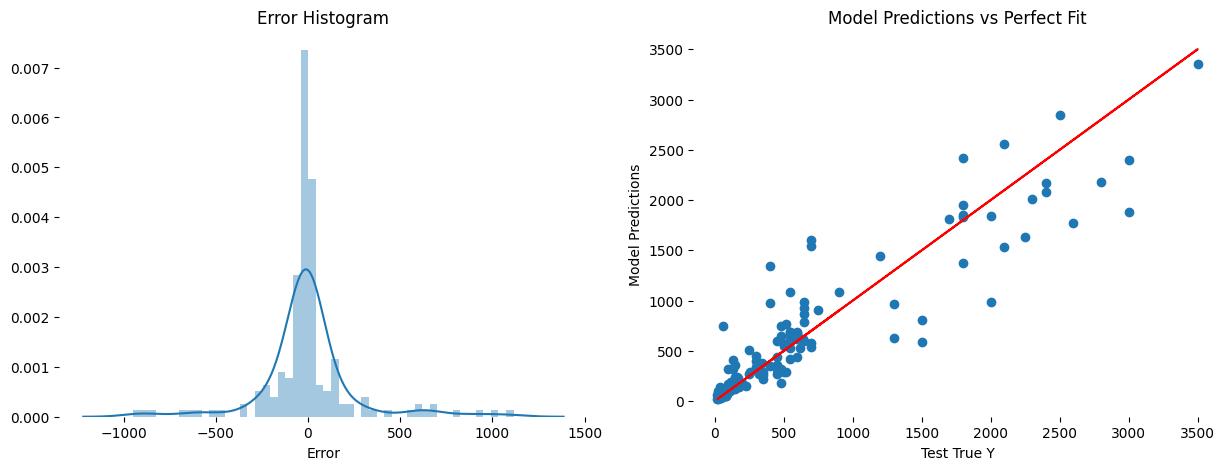

In [173]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,BGR_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - BGR_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [174]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', BGR_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 326.5

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Ada Boost Regressor Model

In [175]:
# Creating Model
ADB_model = AdaBoostRegressor()

# Model Fitting
ADB_model.fit(train_X, train_Y)

# Model Prediction
ADB_model_predicted = ADB_model.predict(test_X)

# Model Score
ADB_model_score = ADB_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, ADB_model_predicted)

In [176]:
print('model_name', ADB_model.__class__.__name__)

ADB_model_score = ADB_model.score(test_X, test_Y)
print('prediction_score', ADB_model_score)

mae = mean_absolute_error(test_Y, ADB_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(test_Y, ADB_model_predicted)
print("Mean Squared Error:", mse)

model_name AdaBoostRegressor
prediction_score 0.6725791545452772
mean_absolute_error 361.1795827424791
Mean Squared Error: 161223.1109492904


C:\Users\T8\AppData\Local\Temp\ipykernel_252\2586052197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

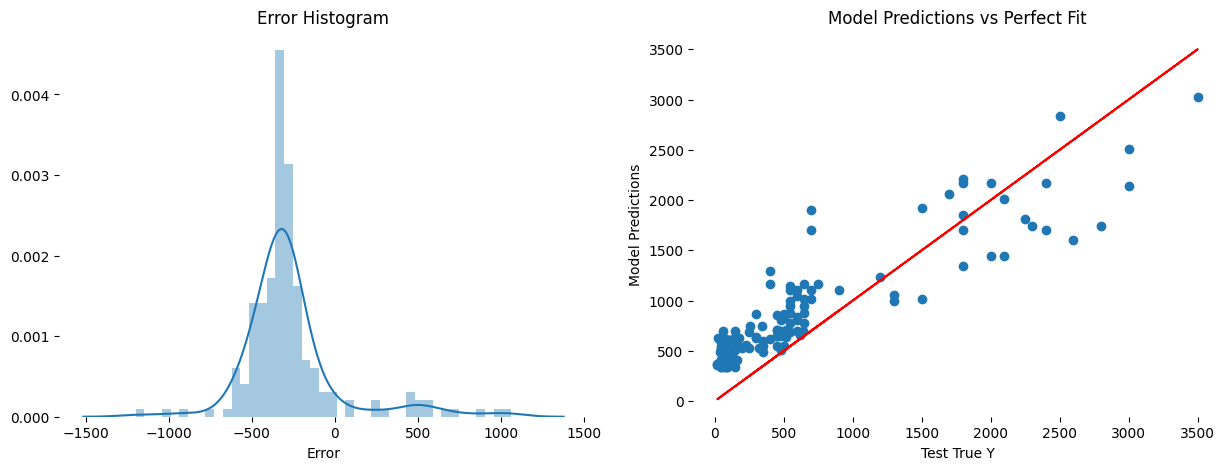

In [177]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,ADB_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - ADB_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [178]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', ADB_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 775.0

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Gradient Boosting Regressor Model

In [179]:
GBR_model = GradientBoostingRegressor(n_estimators=150, random_state=1)
GBR_model.fit(train_X, train_Y)
GBR_model_predicted = GBR_model.predict(test_X)
GBR_model_score = GBR_model.score(test_X, test_Y)

In [180]:
print('model_name', GBR_model.__class__.__name__)

GBR_model_score = GBR_model.score(test_X, test_Y)
print('prediction_score', GBR_model_score)

mae = mean_absolute_error(test_Y, GBR_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(test_Y, GBR_model_predicted)
print("Mean Squared Error:", mse)

model_name GradientBoostingRegressor
prediction_score 0.9076005239619085
mean_absolute_error 115.1196263009224
Mean Squared Error: 45497.8086574074


C:\Users\T8\AppData\Local\Temp\ipykernel_252\2346593421.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

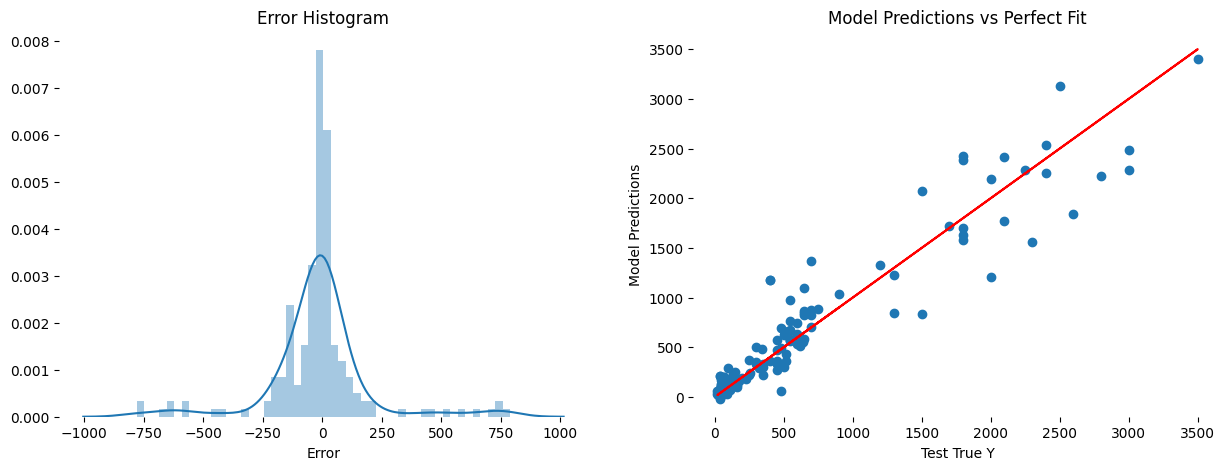

In [181]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,GBR_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - GBR_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [182]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', GBR_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 676.4394278265278

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [183]:
# Random Forest Regressor Model
from xgboost import XGBRegressor
XGBR_model = XGBRegressor()
XGBR_model.fit(train_X, train_Y)
XGBR_model_predicted = XGBR_model.predict(test_X)

In [184]:
print('model_name', XGBR_model.__class__.__name__)

XGBR_model_score = XGBR_model.score(test_X, test_Y)
print('prediction_score', XGBR_model_score)

mae = mean_absolute_error(test_Y, XGBR_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(test_Y, XGBR_model_predicted)
print("Mean Squared Error:", mse)
 

model_name XGBRegressor
prediction_score 0.8691696815528019
mean_absolute_error 122.2978834953714
Mean Squared Error: 64421.2830042931


C:\Users\T8\AppData\Local\Temp\ipykernel_252\4160748023.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

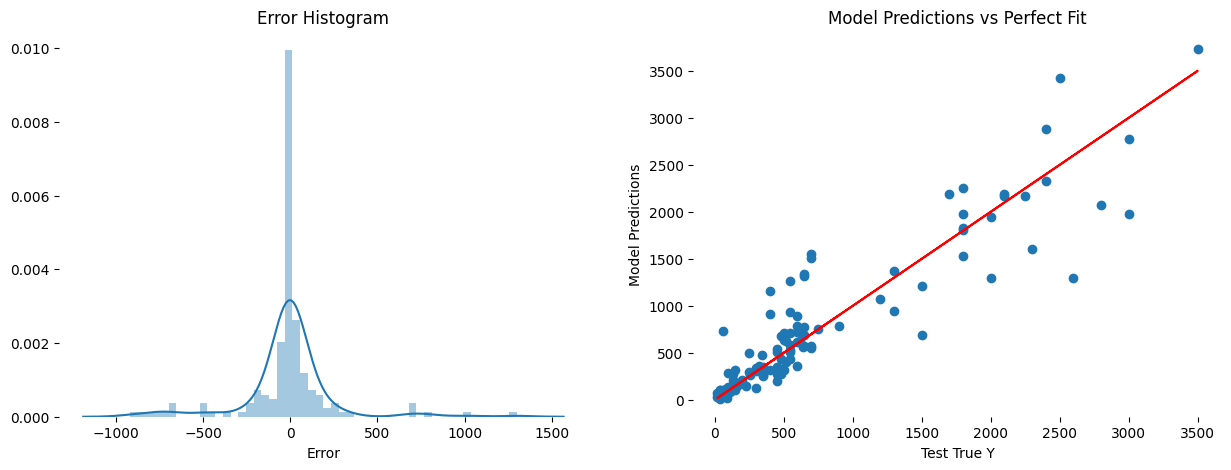

In [185]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,XGBR_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - XGBR_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [186]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', XGBR_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 723.2005

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Let's implement some hyper param tunning using `n_estimators=500, max_depth=10, learning_rate=0.05`.

In [187]:
XGBR_model_500 = XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
XGBR_model_500.fit(train_X, train_Y)
XGBR_model_500_predicted = XGBR_model_500.predict(test_X)

In [188]:
print('model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)')

XGBR_model_500_score = XGBR_model_500.score(test_X, test_Y)
print('prediction_score', XGBR_model_500_score)

mae = mean_absolute_error(test_Y, XGBR_model_500_predicted)
print(mae)

mse = mean_squared_error(test_Y, XGBR_model_500_predicted)
print("Mean Squared Error:", mse)

model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
prediction_score 0.8770651041251696
121.10698449358027
Mean Squared Error: 60533.55072625645


In [189]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', XGBR_model_500.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 683.57263

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


C:\Users\T8\AppData\Local\Temp\ipykernel_252\1941727955.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

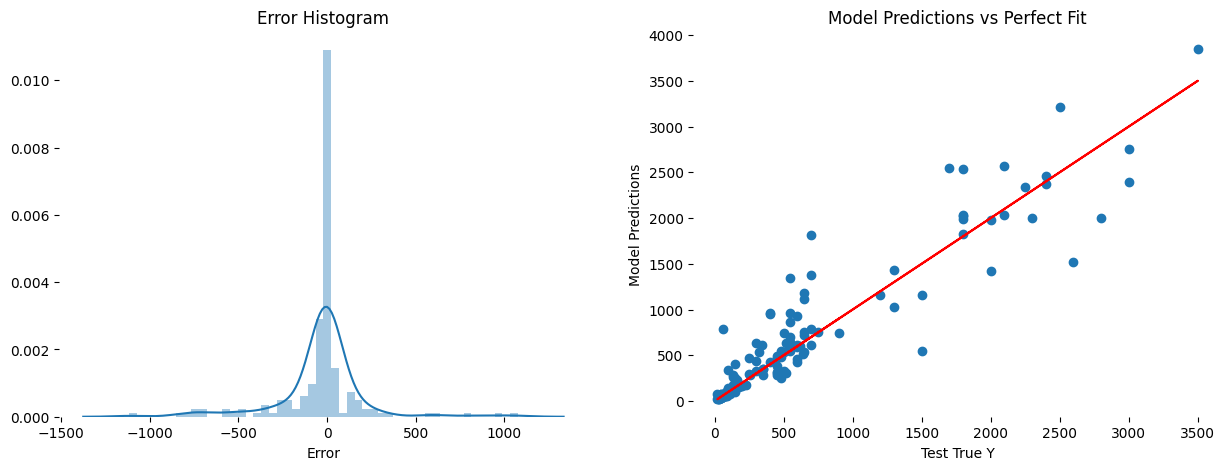

In [190]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,XGBR_model_500_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - XGBR_model_500_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

C:\Users\T8\AppData\Local\Temp\ipykernel_252\1941727955.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

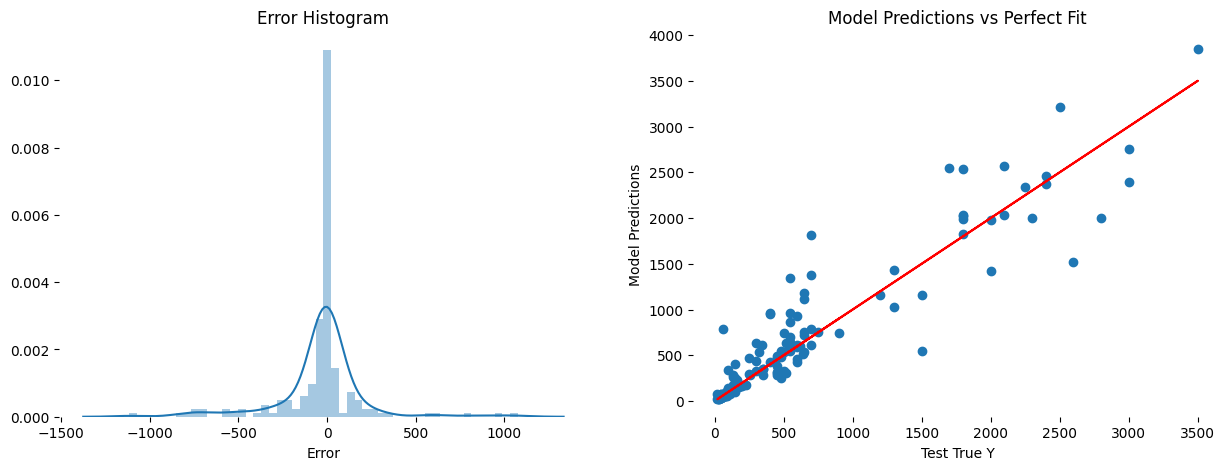

In [191]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,XGBR_model_500_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - XGBR_model_500_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [192]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', XGBR_model_500.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 683.57263

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# HYPER PARAMS TUNNING 

- Using GridSearchCV.


In [193]:
xgbr_model = XGBRegressor() # {'objective': 'reg:squarederror' }
params = {
    'n_estimators': [110, 120, 130, 140], 
    'learning_rate': [ 0.05, 0.075, 0.1],
    'max_depth': [ 7, 9],
    'reg_lambda': [0.3, 0.5]
}

xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)
xgb_reg.fit(train_X, train_Y)

xgbr_model_score = xgb_reg.best_score_
xgbr_model_pred = xgb_reg.predict(test_X)

mae = mean_absolute_error(test_Y, xgbr_model_pred)

In [194]:
xgbr_model_score = xgb_reg.best_score_
print("Best score: %0.3f" % xgb_reg.best_score_)

mae = mean_absolute_error(test_Y, xgbr_model_pred)
print("mean_absolute_error :", mae)

mse = mean_squared_error(test_Y, xgbr_model_pred)
print("Mean Squared Error:", mse)

print("Best parameters set:", xgb_reg.best_params_)

Best score: 0.758
mean_absolute_error : 110.102341834535
Mean Squared Error: 50422.44926818684
Best parameters set: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}


C:\Users\T8\AppData\Local\Temp\ipykernel_252\3154491849.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

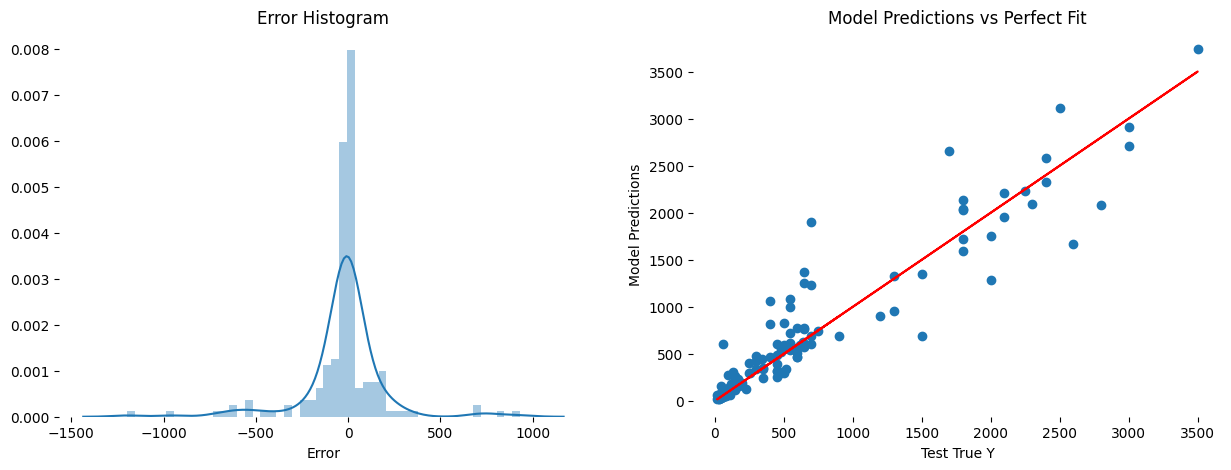

In [195]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,xgbr_model_pred)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - xgbr_model_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [196]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', xgb_reg.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 729.28796

Original Price: 750


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [197]:
rfr_model = RandomForestRegressor(random_state=35)

rfr_params_grid = {
    'n_estimators' : [600,750,800,850],
    'max_depth' : [7],
    'max_features': [5],
    'min_samples_leaf' : [3],
    'min_samples_split' : [4, 6 ,9]
}

gscv_rfr_cv = GridSearchCV(estimator=rfr_model, 
                                      param_grid=rfr_params_grid,
                                      cv = 5 ,
                                      n_jobs = -1,
                                      verbose = 5)

gscv_rfr_cv.fit(train_X, train_Y)

gscv_rfr_cv_score = gscv_rfr_cv.best_score_

gscv_rfr_cv_pred = gscv_rfr_cv.predict(test_X)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [198]:
print('model_name Random Forest Regressor Hyper Params Tunning')

gscv_rfr_cv_score = gscv_rfr_cv.best_score_
print("Best score: %0.3f" % gscv_rfr_cv.best_score_)

mae = mean_absolute_error(test_Y, gscv_rfr_cv_pred)
print("mean_absolute_error :", mae)

print("Best parameters set:", gscv_rfr_cv.best_params_)

mse = mean_squared_error(test_Y, gscv_rfr_cv_pred)
print("Mean Squared Error:", mse)

model_name Random Forest Regressor Hyper Params Tunning
Best score: 0.780
mean_absolute_error : 127.197800487718
Best parameters set: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 850}
Mean Squared Error: 52787.89769134511


C:\Users\T8\AppData\Local\Temp\ipykernel_252\1462706360.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

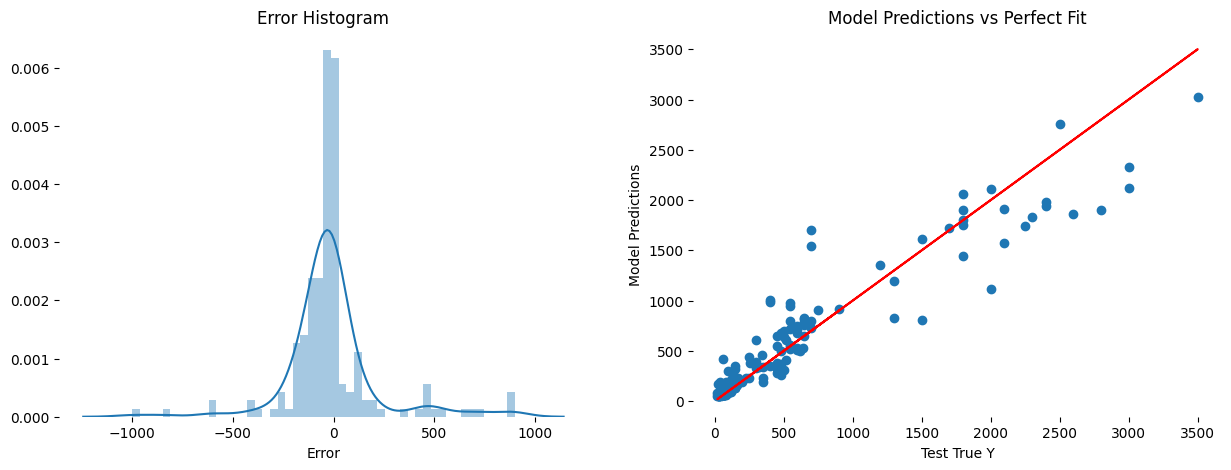

In [199]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,gscv_rfr_cv_pred)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 188) - gscv_rfr_cv_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [200]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', gscv_rfr_cv.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb           3
density          3
property         3
rooms            8
bedroom          4
toilets          3
ensuite          2
condition        3
constituency    26
council          2
carport          2
pool             0
furnished        1
cottage          2
power            1
pbackup          0
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Prediction Price: 433.02172340680227

Original Price: 750
